In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
from scipy.stats import variation


In [57]:
pip install joblib


In [ ]:
%matplotlib inline
warnings.filterwarnings ('ignore')
sns.set_style("darkgrid")


In [ ]:
import sklearn
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/data/data/train.csv",sep="|")


In [ ]:
data.head()

,lineID,day,pid,adFlag,availability,competitorPrice,click,basket,order,price,revenue
0,1,1,6570,0,2,14.60,1,0,0,16.89,0.00
1,2,1,14922,1,1,8.57,0,1,0,8.75,0.00
2,3,1,16382,0,1,14.77,0,1,0,16.06,0.00
3,4,1,1145,1,1,6.59,0,0,1,6.55,6.55
4,5,1,3394,0,1,4.39,0,0,1,4.14,4.14


In [ ]:
# Display basic information
print("Dataset shape:", data.shape)
print("First 5 rows:\n", data.head())
print("Data Types:\n", data.dtypes)



Dataset shape: (2756003, 11)
First 5 rows:
    lineID  day    pid  adFlag  availability  competitorPrice  click  basket  \
0       1    1   6570       0             2            14.60      1       0   
1       2    1  14922       1             1             8.57      0       1   
2       3    1  16382       0             1            14.77      0       1   
3       4    1   1145       1             1             6.59      0       0   
4       5    1   3394       0             1             4.39      0       0   

   order  price  revenue  
0      0  16.89     0.00  
1      0   8.75     0.00  
2      0  16.06     0.00  
3      1   6.55     6.55  
4      1   4.14     4.14  
Data Types:
 lineID               int64
day                  int64
pid                  int64
adFlag               int64
availability         int64
competitorPrice    float64
click                int64
basket               int64
order                int64
price              float64
revenue            float64
dtype: ob

In [ ]:
# Check for missing values
print("\nMissing values:\n", data.isnull().sum())


Missing values:
 lineID                  0
day                     0
pid                     0
adFlag                  0
availability            0
competitorPrice    100687
click                   0
basket                  0
order                   0
price                   0
revenue                 0
dtype: int64


In [ ]:
print("\nStatistical Summary:\n", data.describe())



Statistical Summary:
              lineID           day           pid        adFlag  availability  \
count  2.756003e+06  2.756003e+06  2.756003e+06  2.756003e+06  2.756003e+06   
mean   1.378002e+06  4.992118e+01  1.044790e+04  3.177888e-01  1.111035e+00   
std    7.955897e+05  2.529451e+01  6.456013e+03  4.656170e-01  3.921785e-01   
min    1.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00  1.000000e+00   
25%    6.890015e+05  3.100000e+01  4.313000e+03  0.000000e+00  1.000000e+00   
50%    1.378002e+06  5.000000e+01  1.007700e+04  0.000000e+00  1.000000e+00   
75%    2.067002e+06  7.100000e+01  1.614400e+04  1.000000e+00  1.000000e+00   
max    2.756003e+06  9.200000e+01  2.203500e+04  1.000000e+00  4.000000e+00   

       competitorPrice         click        basket         order  \
count     2.655316e+06  2.756003e+06  2.756003e+06  2.756003e+06   
mean      1.277288e+01  5.743198e-01  1.698423e-01  2.558379e-01   
std       1.275295e+01  4.944458e-01  3.754943e-01  4.363312e

### If the data contains multiple entries for each day, we can aggregate the revenue column to create a unique daily time series. This approach involves summing up the revenue values (or using another suitable aggregation method) for each day to form a continuous daily series, which is essential for time series analysis.

In [ ]:
# Aggregate the data by day to create unique values for each day
# Assuming the 'day' column is sequential and represents the days since the start of the dataset
data_daily = data.groupby('day').agg({
    'revenue': 'sum'
}).reset_index()

In [ ]:
start_date = pd.to_datetime("2024-01-01")
data_daily['date'] = start_date + pd.to_timedelta(data_daily['day'], unit='D')

# Set the new 'date' column as the index
data_daily.set_index('date', inplace=True)

# Verify the new dataset structure
print(data_daily.head())

            day    revenue
date                      
2024-01-02    1   94175.72
2024-01-03    2   83350.75
2024-01-04    3  134964.76
2024-01-05    4  140823.12
2024-01-06    5  136560.69


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import MinMaxScaler

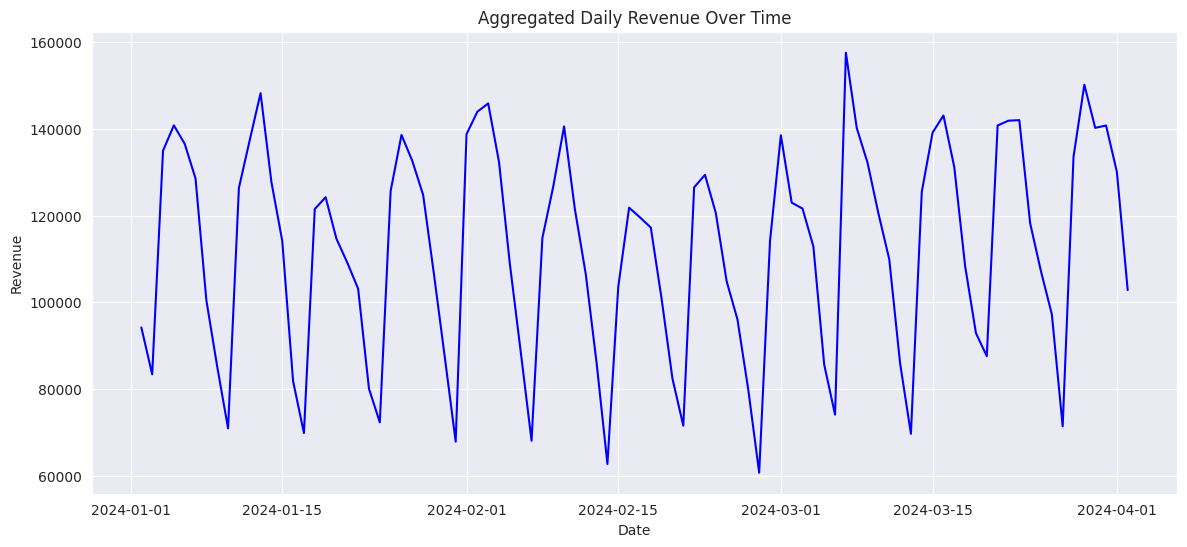

In [ ]:
# Plotting revenue after aggregation
plt.figure(figsize=(14, 6))
plt.plot(data_daily.index, data_daily['revenue'], color='blue')
plt.title("Aggregated Daily Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()

In [ ]:
# Applying Moving Averages for trend analysis
data_daily['Revenue_7MA'] = data_daily['revenue'].rolling(window=7).mean()
data_daily['Revenue_30MA'] = data_daily['revenue'].rolling(window=30).mean()


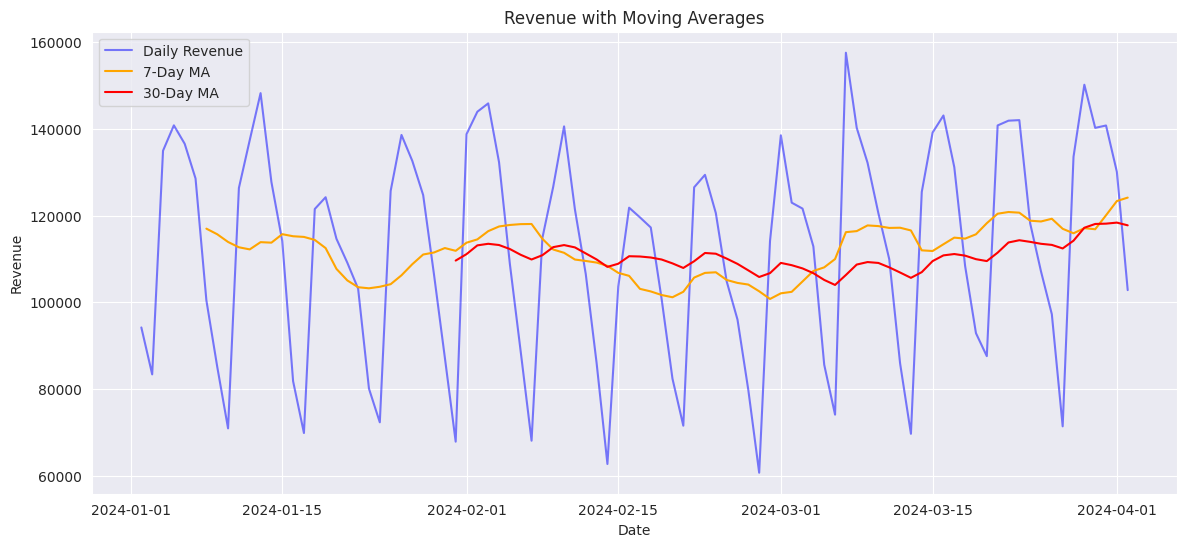

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(data_daily['revenue'], label='Daily Revenue', color='blue', alpha=0.5)
plt.plot(data_daily['Revenue_7MA'], label='7-Day MA', color='orange')
plt.plot(data_daily['Revenue_30MA'], label='30-Day MA', color='red')
plt.title("Revenue with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.show()

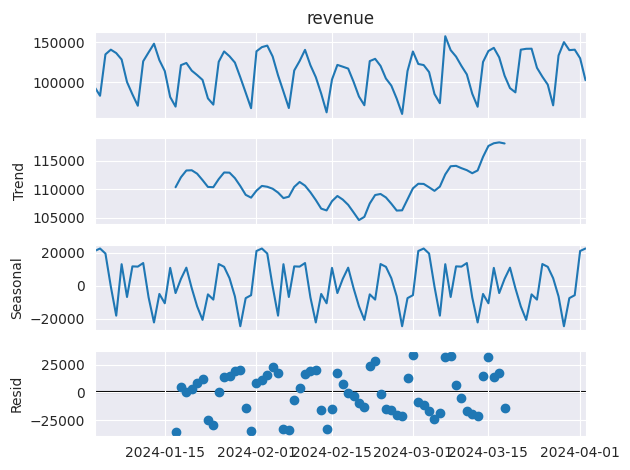

In [ ]:
# Decomposing the time series to identify trend, seasonality, and residuals
decompose_result = seasonal_decompose(data_daily['revenue'], model='additive', period=30)
decompose_result.plot()
plt.show()

In [ ]:
# Checking for stationarity with rolling mean and standard deviation
rolling_mean = data_daily['revenue'].rolling(window=30).mean()
rolling_std = data_daily['revenue'].rolling(window=30).std()


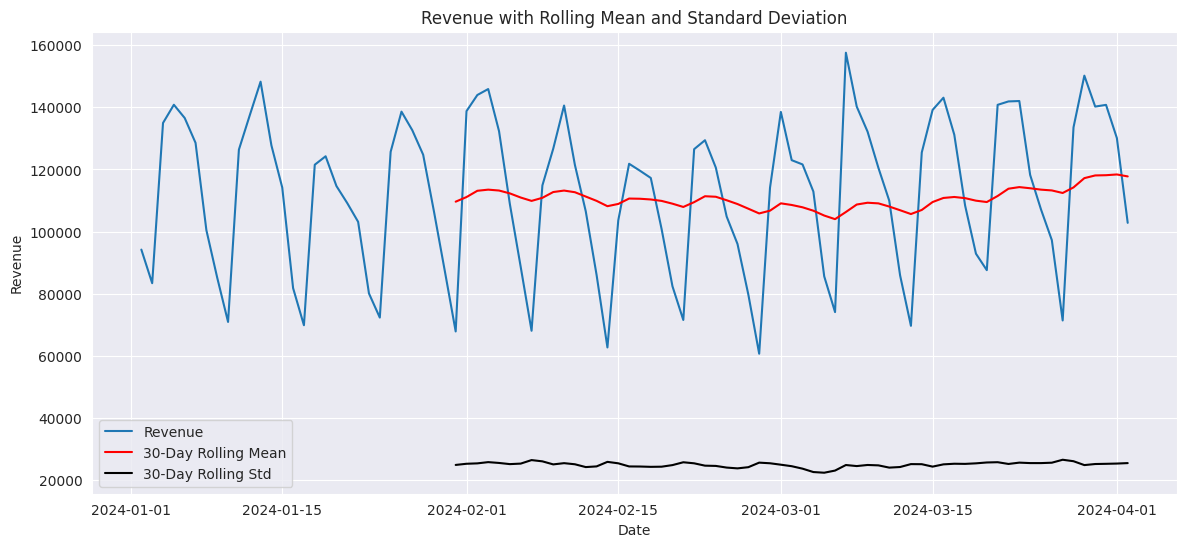

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(data_daily['revenue'], label='Revenue')
plt.plot(rolling_mean, color='red', label='30-Day Rolling Mean')
plt.plot(rolling_std, color='black', label='30-Day Rolling Std')
plt.title("Revenue with Rolling Mean and Standard Deviation")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.show()

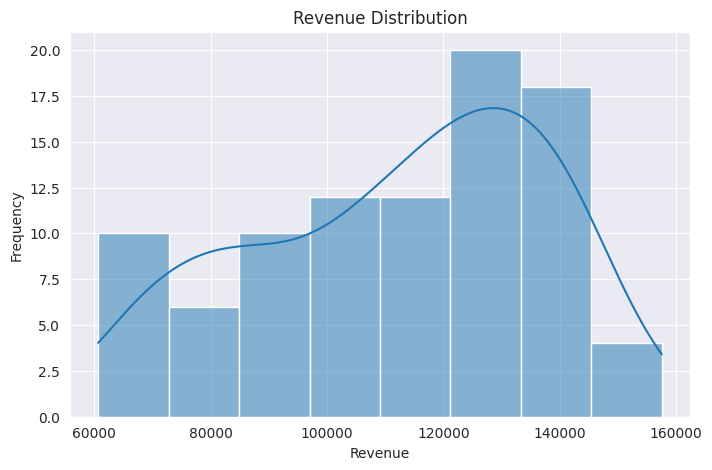

In [ ]:
# Distribution of revenue values
plt.figure(figsize=(8, 5))
sns.histplot(data_daily['revenue'], kde=True)
plt.title("Revenue Distribution")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.show()

<Figure size 1000x600 with 0 Axes>

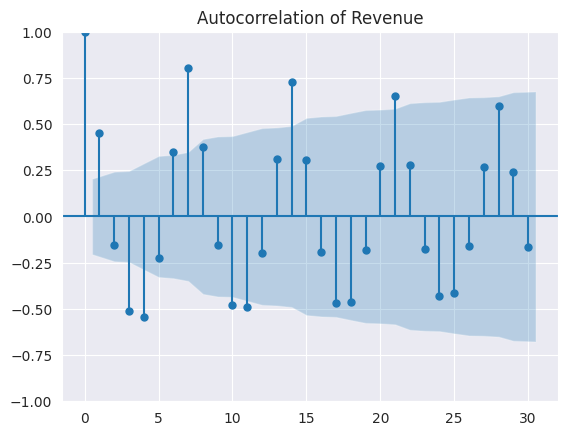

In [ ]:
# Autocorrelation and Partial Autocorrelation to check for seasonality
plt.figure(figsize=(10, 6))
plot_acf(data_daily['revenue'].dropna(), lags=30)
plt.title("Autocorrelation of Revenue")
plt.show()


<Figure size 1000x600 with 0 Axes>

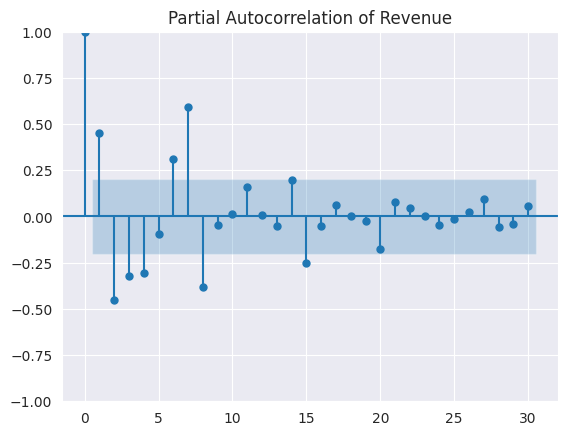

In [ ]:
plt.figure(figsize=(10, 6))
plot_pacf(data_daily['revenue'].dropna(), lags=30)
plt.title("Partial Autocorrelation of Revenue")
plt.show()

# Observations from Autocorrelation (ACF) and Partial Autocorrelation (PACF) Plots

## Autocorrelation (ACF) Plot
- **High Correlation at Lag 1:**  
  There is a significant spike at lag 1, indicating a strong correlation between revenue values on consecutive days. This suggests some level of persistence in revenue values over time, where today's revenue could be influenced by yesterday's revenue.

- **Significant Lags Up to Around Lag 10:**  
  We see additional spikes at lags 2, 3, 4, and some scattered up to lag 10. This means that the revenue values up to 10 days apart show some level of autocorrelation, which implies short-term memory in the revenue data.

- **Gradual Decay:**  
  The correlation values decay over time but with fluctuations, indicating possible seasonality or cyclical patterns in the data. These patterns might correspond to weekly or biweekly trends (e.g., certain days of the week having consistently higher or lower revenue).

## Partial Autocorrelation (PACF) Plot
- **Significant Spike at Lag 1 Only:**  
  The PACF plot shows a strong spike at lag 1 and then quickly drops off. This suggests that the data may follow an autoregressive process of order 1 (AR(1)), where each revenue value is primarily dependent on the previous day's value, and the influence of further past values diminishes significantly.

- **Small Oscillations Beyond Lag 1:**  
  After lag 1, the partial autocorrelations are minimal and mostly fall within the confidence interval (the shaded region). This suggests that while there might be some minor influence from earlier lags, they do not contribute significantly to the prediction of current revenue values once we account for the immediate past value.


# Model Building

In [33]:
pip install prophet

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
import xgboost as xgb
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler




In [43]:
# Step 1: Aggregate revenue by day
data_daily = data.groupby('day')['revenue'].sum().reset_index()

# Step 2: Create a date index starting from a specific start date
start_date = pd.to_datetime("2024-01-01")
data_daily['date'] = start_date + pd.to_timedelta(data_daily['day'], unit='D')

# Step 3: Set 'date' as the index and keep only the 'revenue' column
data_daily.set_index('date', inplace=True)
data_daily = data_daily[['revenue']]

# Step 4: Split data into training and testing sets
train_data = data_daily.iloc[:-30]  # All data except the last 30 days
test_data = data_daily.iloc[-30:]   # Last 30 days

# Print to verify the new dataset structure
print("Data Daily:")
print(data_daily.head())
print("\nData Shapes:")
print(f"Full dataset shape: {data_daily.shape}")
print(f"Training data shape: {train_data.shape}")
print(f"Testing data shape: {test_data.shape}")

Data Daily:
              revenue
date                 
2024-01-02   94175.72
2024-01-03   83350.75
2024-01-04  134964.76
2024-01-05  140823.12
2024-01-06  136560.69

Data Shapes:
Full dataset shape: (92, 1)
Training data shape: (62, 1)
Testing data shape: (30, 1)


# ARIMA Model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


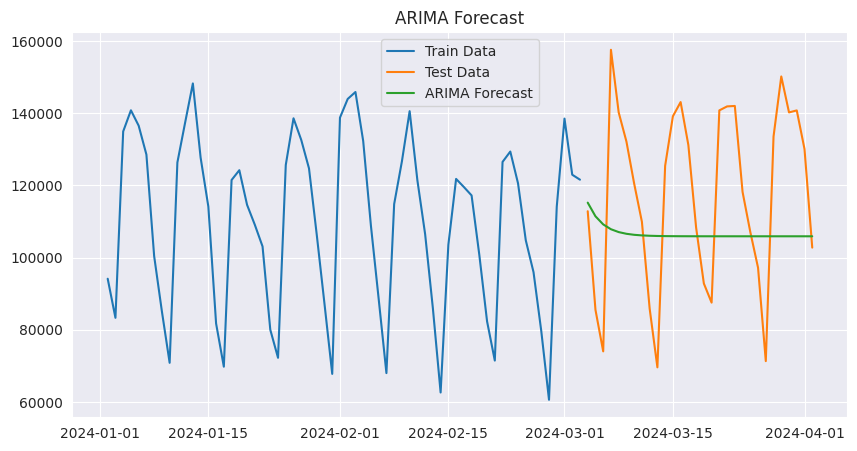

In [44]:
# ARIMA
arima_model = ARIMA(train_data, order=(1, 1, 1))
arima_result = arima_model.fit()
arima_forecast = arima_result.forecast(steps=30)
arima_rmse = np.sqrt(mean_squared_error(test_data, arima_forecast))

# Plotting ARIMA
plt.figure(figsize=(10, 5))
plt.plot(train_data, label='Train Data')
plt.plot(test_data, label='Test Data')
plt.plot(test_data.index, arima_forecast, label='ARIMA Forecast')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()


# SARIMA Model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


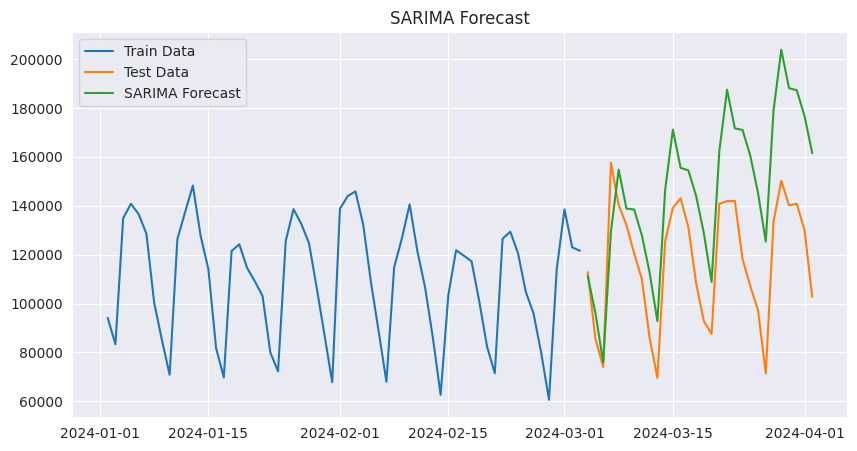

In [45]:
# SARIMA
sarima_model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
sarima_result = sarima_model.fit(disp=False)
sarima_forecast = sarima_result.forecast(steps=30)
sarima_rmse = np.sqrt(mean_squared_error(test_data, sarima_forecast))

# Plotting SARIMA
plt.figure(figsize=(10, 5))
plt.plot(train_data, label='Train Data')
plt.plot(test_data, label='Test Data')
plt.plot(test_data.index, sarima_forecast, label='SARIMA Forecast')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()


# Prophet Model

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpouw5jav3/nqzer76o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpouw5jav3/t1l2bxf2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=959', 'data', 'file=/tmp/tmpouw5jav3/nqzer76o.json', 'init=/tmp/tmpouw5jav3/t1l2bxf2.json', 'output', 'file=/tmp/tmpouw5jav3/prophet_modeljckj3bx1/prophet_model-20241102205014.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:50:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:50:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet RMSE: 20740.10


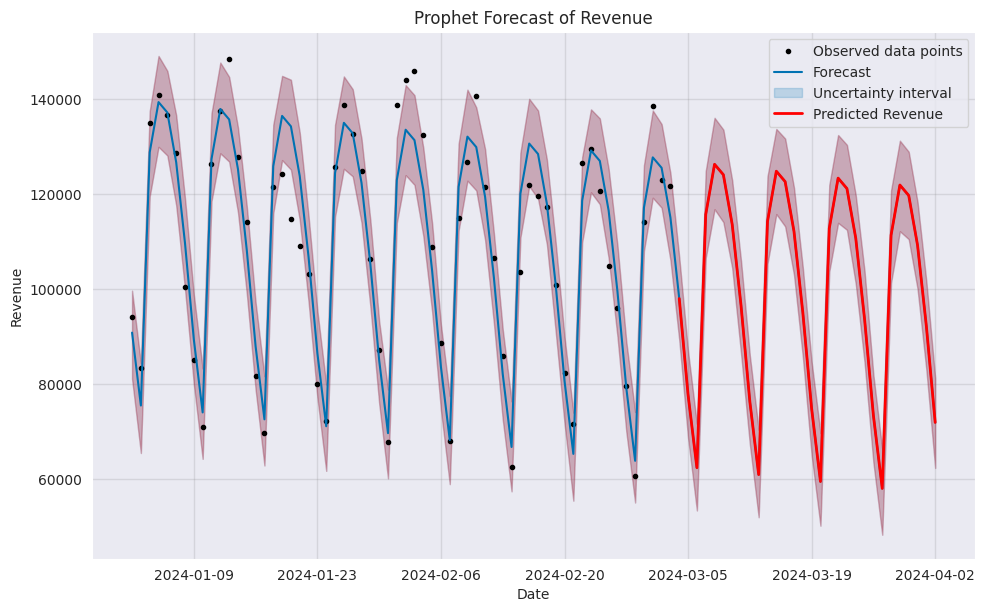

In [48]:

# Prepare the data for Prophet
df_prophet = train_data.reset_index()
df_prophet.columns = ['ds', 'y']  # Prophet requires 'ds' for date and 'y' for target variable

# Initialize and fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(df_prophet)

# Create a future dataframe for the next 30 days
future_dates = prophet_model.make_future_dataframe(periods=30)

# Predict the future values
prophet_forecast = prophet_model.predict(future_dates)

# Calculate RMSE for the last 30 days of test data
# Extract only the predictions for the test period
prophet_test_forecast = prophet_forecast[-30:]['yhat']
prophet_rmse = np.sqrt(mean_squared_error(test_data['revenue'], prophet_test_forecast))

print(f"Prophet RMSE: {prophet_rmse:.2f}")

# Plot the forecast
fig = prophet_model.plot(prophet_forecast)

# Highlight the predicted values
ax = fig.gca()
ax.plot(prophet_forecast['ds'][-30:], prophet_forecast['yhat'][-30:], color='red', linewidth=2, label='Predicted Revenue')
ax.fill_between(prophet_forecast['ds'], prophet_forecast['yhat_lower'], prophet_forecast['yhat_upper'], color='red', alpha=0.2)

plt.title('Prophet Forecast of Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()


# XGBoost Model

XGBoost RMSE: 11910.07


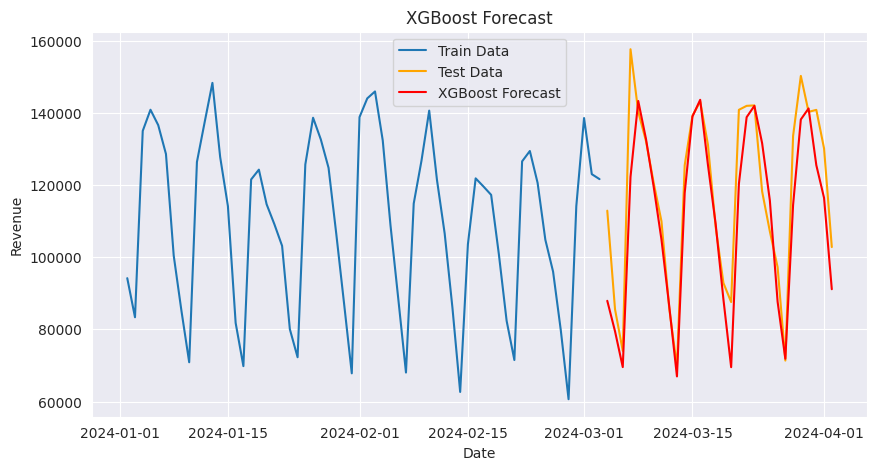

In [58]:
import pandas as pd
import numpy as np
import xgboost as xgb
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


# Step 5: Create lagged features for XGBoost
lagged_data = pd.concat([train_data.shift(i) for i in range(1, 11)], axis=1)
lagged_data.columns = ['lag_' + str(i) for i in range(1, 11)]
lagged_data['target'] = train_data.values
lagged_data = lagged_data.dropna()

# Split features and target variable
X = lagged_data.drop('target', axis=1)
y = lagged_data['target']

# Split into training and test sets
X_train = X
y_train = y

# Prepare the test set with lagged features
lagged_test_data = pd.concat([data_daily.shift(i) for i in range(1, 11)], axis=1)
lagged_test_data.columns = ['lag_' + str(i) for i in range(1, 11)]
lagged_test_data['target'] = data_daily['revenue'].values
lagged_test_data = lagged_test_data.dropna()

# Create X_test and y_test
X_test = lagged_test_data.drop('target', axis=1)[-30:]  # Only get the last 30 entries for the test set
y_test = lagged_test_data['target'][-30:]

# Step 6: Fit XGBoost model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Save the model
joblib.dump(xgb_model, 'xgb_forecast_model.joblib')  # For joblib

# Step 7: Make predictions
xgb_forecast = xgb_model.predict(X_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_forecast))

print(f"XGBoost RMSE: {xgb_rmse:.2f}")

# Step 8: Plotting XGBoost results
plt.figure(figsize=(10, 5))
plt.plot(data_daily.index[:-30], data_daily['revenue'][:-30], label='Train Data')
plt.plot(data_daily.index[-30:], data_daily['revenue'][-30:], label='Test Data', color='orange')
plt.plot(data_daily.index[-30:], xgb_forecast, label='XGBoost Forecast', color='red')
plt.title('XGBoost Forecast')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()


# LSTM Model

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.3221
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2311
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1656
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1083
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0789
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0876
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1143
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0952
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0877
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0704
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0792
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0874
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0846 
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0856
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0825 
Epoch 16/100
2/2 

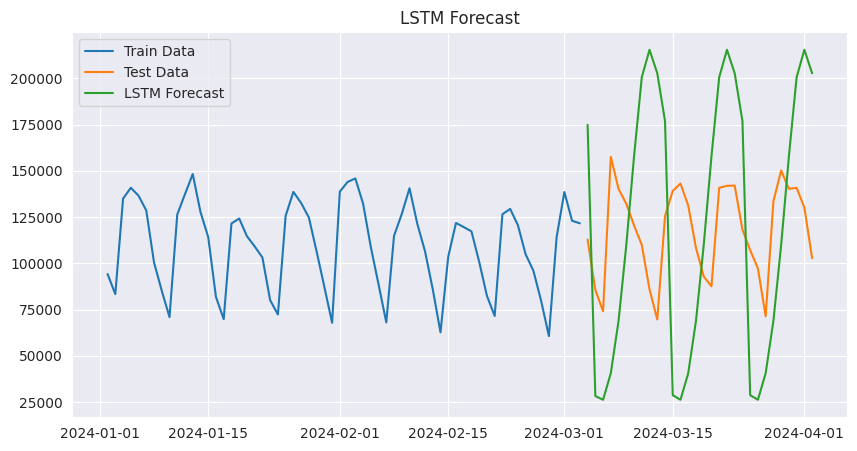

In [52]:
# Scaling data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))

# Prepare data for LSTM
X_train_lstm = []
y_train_lstm = []
for i in range(10, len(train_scaled)):
    X_train_lstm.append(train_scaled[i-10:i, 0])
    y_train_lstm.append(train_scaled[i, 0])
X_train_lstm, y_train_lstm = np.array(X_train_lstm), np.array(y_train_lstm)

# LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_lstm, y_train_lstm, epochs=100, batch_size=32)

# Prepare test data
inputs = df.values[len(df) - len(test_data) - 10:]
inputs = scaler.transform(inputs.reshape(-1, 1))
X_test_lstm = []
for i in range(10, 40):
    X_test_lstm.append(inputs[i-10:i, 0])
X_test_lstm = np.array(X_test_lstm)
lstm_forecast = model.predict(X_test_lstm)
lstm_forecast = scaler.inverse_transform(lstm_forecast)
lstm_rmse = np.sqrt(mean_squared_error(test_data, lstm_forecast))

# Plotting LSTM
plt.figure(figsize=(10, 5))
plt.plot(train_data, label='Train Data')
plt.plot(test_data, label='Test Data')
plt.plot(test_data.index, lstm_forecast, label='LSTM Forecast')
plt.title('LSTM Forecast')
plt.legend()
plt.show()


In [53]:
pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.6 MB/s eta 0:00:00


Trial 10 Complete [00h 00m 13s]
val_loss: 0.07098008692264557

Best val_loss So Far: 0.07098008692264557
Total elapsed time: 00h 02m 05s
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step
LSTM RMSE: 40824.03


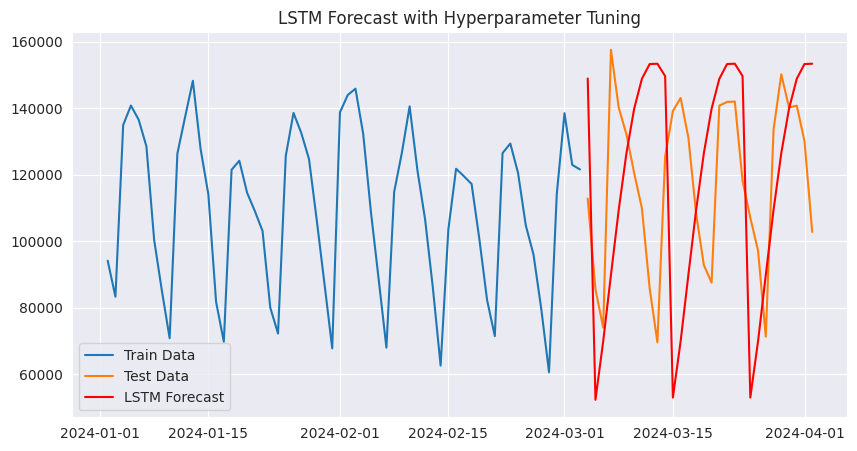

In [55]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from kerastuner.tuners import RandomSearch
from kerastuner import HyperParameters

# Scale data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))

# Prepare data for LSTM
X_train_lstm = []
y_train_lstm = []
for i in range(10, len(train_scaled)):
    X_train_lstm.append(train_scaled[i-10:i, 0])
    y_train_lstm.append(train_scaled[i, 0])
X_train_lstm, y_train_lstm = np.array(X_train_lstm), np.array(y_train_lstm)

# Reshape data for LSTM
X_train_lstm = X_train_lstm.reshape(X_train_lstm.shape[0], X_train_lstm.shape[1], 1)

# Function to create model
def create_model(hp: HyperParameters):
    model = Sequential()
    units = hp.Int('units', min_value=10, max_value=100, step=10)  # Hyperparameter for number of LSTM units
    model.add(LSTM(units=units, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)))
    model.add(Dropout(hp.Float('dropout_rate', 0.0, 0.5, step=0.1)))  # Hyperparameter for dropout rate
    model.add(LSTM(units=units))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Hyperparameter tuning using Keras Tuner
tuner = RandomSearch(
    create_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='lstm_hyperparameter_tuning'
)

tuner.search(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, validation_split=0.2)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Prepare test data
inputs = df.values[len(df) - len(test_data) - 10:]
inputs = scaler.transform(inputs.reshape(-1, 1))
X_test_lstm = []
for i in range(10, 40):
    X_test_lstm.append(inputs[i-10:i, 0])
X_test_lstm = np.array(X_test_lstm)
X_test_lstm = X_test_lstm.reshape(X_test_lstm.shape[0], X_test_lstm.shape[1], 1)

# Predict using the best model
lstm_forecast = best_model.predict(X_test_lstm)
lstm_forecast = scaler.inverse_transform(lstm_forecast)
lstm_rmse = np.sqrt(mean_squared_error(test_data.values, lstm_forecast))

print(f"LSTM RMSE: {lstm_rmse:.2f}")

# Plotting LSTM
plt.figure(figsize=(10, 5))
plt.plot(train_data.index, train_data.values, label='Train Data')
plt.plot(test_data.index, test_data.values, label='Test Data')
plt.plot(test_data.index, lstm_forecast, label='LSTM Forecast', color='red')
plt.title('LSTM Forecast with Hyperparameter Tuning')
plt.legend()
plt.show()


In [56]:
# RMSE values
print(f"ARIMA RMSE: {arima_rmse}")
print(f"SARIMA RMSE: {sarima_rmse}")
print(f"Prophet RMSE: {prophet_rmse}")
print(f"XGBoost RMSE: {xgb_rmse}")
print(f"LSTM RMSE: {lstm_rmse}")


ARIMA RMSE: 27711.970612461788
SARIMA RMSE: 35366.47530823517
Prophet RMSE: 20740.10430902378
XGBoost RMSE: 11910.065575993727
LSTM RMSE: 40824.03463415301
